In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import random
import csv
import gensim
from wordcloud import WordCloud #To display text data

In [138]:
from tensorflow.keras.preprocessing.text import Tokenizer #To tokenise our text data
from tensorflow.keras.preprocessing.sequence import pad_sequences #To pad those datasets which are not long enough as deep learning models are always feeded with fixed length input not more not less.
from tensorflow.keras.models import Sequential #model used
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [139]:
real_news = pd.read_csv("crypto_news_parsed_2018_validation.csv")

In [140]:
real_news.head()

,url,title,text,html,year,author,source
0,https://www.ccn.com/paris-hiltons-hotel-mogul-...,Paris Hilton’s Hotel Mogul Father to Sell $38 ...,A group of journalists who left The Denver Pos...,<p>A group of journalists who left The Denver ...,2018,Lester Coleman,accepts_bitcoin
1,https://www.ccn.com/playboy-sues-cryptocurrenc...,Playboy Sues Cryptocurrency Company for Breach...,"Playboy Enterprises, the parent company of Pla...","<p>Playboy Enterprises, the parent company of ...",2018,Jimmy Aki,accepts_bitcoin
2,https://www.ccn.com/microsoft-reboots-bitcoin-...,Microsoft Restores Bitcoin Payments after Temp...,Hardware and software giant Microsoft reported...,<p>Hardware and software giant Microsoft repor...,2018,Francisco Memoria,accepts_bitcoin
3,https://www.ccn.com/japans-gmo-launches-app-to...,Japan’s GMO Launches App to Reward Gamers in B...,"GMO Internet, a leading Japanese Internet serv...","<p>GMO Internet, a leading Japanese Internet s...",2018,Lester Coleman,accepts_bitcoin
4,https://www.ccn.com/japanese-building-in-tokyo...,547 Bitcoins: $6 Million Commercial Japanese B...,A Tokyo-based real estate firm is selling a sm...,"<p><span style=""font-weight: 400;"">A Tokyo-bas...",2018,Joseph Young,accepts_bitcoin


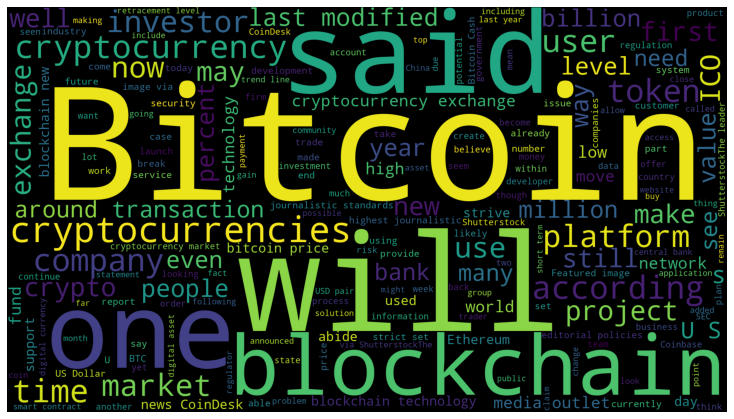

In [5]:
#wordcloud
text = '. '.join(real_news['text'].tolist())
wordcloud = WordCloud(width=1920,height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [141]:
#Exploring fake news

fake_news = pd.read_csv("fake.csv")

In [142]:
fake_news.head()

,title,text,year,author,source
0,"Believe Based Apps ICO Alphabet, Money Price C...",Malta: Earning the Nickname Blockchain IslandB...,2018,Joseph Young,altcoin_analysis
1,30% for to Plunge? Coinbase Crypto Slides Camp...,"The cryptocurrency payments platform wrote:""To...",2018,Josiah Wilmoth,bitcoin_&_blockchain_investments
2,Kraken Signs Kidnap Sighting Saving Finally Bi...,"In a recent interview with the New York Times,...",2018,Brady Dale,feature
3,XRP Asia Spending Crypto Second Almost Concern...,About d10ed10e conferences have been at the he...,2018,Annaliese Milano,feature
4,Share of Invests 'Game-Changer' Inquest Could ...,"Asian Investment Interest Has Risen, But Is It...",2018,Conor Maloney,ethereum_news


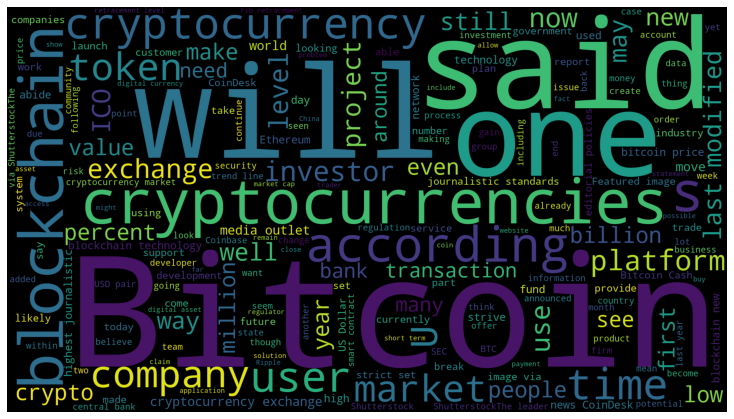

In [8]:
#wordcloud
f_text = '. '.join(fake_news['text'].tolist())
wordcloud = WordCloud(width=1920,height=1080).generate(f_text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [143]:
real_news['author'].value_counts()

Josiah Wilmoth     842
 Aayush Jindal     771
Wolfie Zhao        538
Nikhilesh De       513
Samburaj Das       463
                  ... 
Magda Borowik        1
 SimpleFX            1
Hector Sanchez       1
Stuart Oden          1
Jason Calacanis      1
Name: author, Length: 290, dtype: int64

In [144]:
real_news['text'] = real_news['title'] + real_news['text']
fake_news['text'] = fake_news['title'] + fake_news['text']

In [145]:
real_news['text'] = real_news['text'].apply(lambda x: str(x).lower())
fake_news['text'] = fake_news['text'].apply(lambda x: str(x).lower())

In [146]:
real_news['class'] = 1
fake_news['class'] = 0

In [147]:
real_news.columns

Index(['url', 'title', 'text', 'html', 'year', 'author', 'source', 'class'], dtype='object')

In [148]:
real_news = real_news[['text','class']]
fake_news = fake_news[['text','class']]

In [149]:
fake_news.head()

,text,class
0,"believe based apps ico alphabet, money price c...",0
1,30% for to plunge? coinbase crypto slides camp...,0
2,kraken signs kidnap sighting saving finally bi...,0
3,xrp asia spending crypto second almost concern...,0
4,share of invests 'game-changer' inquest could ...,0


In [150]:
data = real_news.append(fake_news)

In [151]:
data.sample(5)

,text,class
2713,partnership free in the it’s leader degree sup...,0
10813,trade.io appoints banking veteran david hannig...,1
1670,permits road losses largest bitcoins money tec...,0
260,"ledger’s by hedge cash, it altcoin bitcoin bab...",0
8083,bitcoin and by trading crypto warns government...,0


In [152]:
len(data)

22239

In [153]:
clean_text = []
for text_data in data['text']:
    text_data = text_data.split(' ')
    clean_data = []
    for e in text_data:
        new_data = ''.join(filter(str.isalnum,e))
        if(len(new_data)>0):
            clean_data.append(new_data)
    cleaned = ' '.join(clean_data)
    clean_text.append(cleaned)

data['text'] = clean_text

In [154]:
y = data['class'].values

In [155]:
X = [d.split() for d in data['text'].tolist()]

In [156]:
DIM = 100
word2vec_model = gensim.models.Word2Vec(sentences=X, vector_size=DIM, window=10, min_count = 1)

In [157]:
vocab_len = len(word2vec_model.wv)
print(vocab_len)

123471


In [158]:
word2vec_model.wv.most_similar('bitcoin')

[('bitcoins', 0.7181262373924255),
 ('btc', 0.6378958821296692),
 ('bch', 0.5777492523193359),
 ('cryptocurrency', 0.5255966782569885),
 ('cryptocurrencys', 0.5072703957557678),
 ('cryptos', 0.5005436539649963),
 ('cryptocurrencies', 0.4994756877422333),
 ('litecoin', 0.47654685378074646),
 ('remainsi', 0.46583661437034607),
 ('ver', 0.4636707007884979)]

In [159]:
word2vec_model.wv['bitcoin']

array([ 1.4750859e+00,  4.3024826e-01, -1.7569463e+00, -2.6833508e+00,
       -4.5802996e-01,  5.9939446e+00,  1.6945757e+00,  3.4378166e+00,
        2.2626579e+00, -1.1631943e+00,  5.6164736e-01,  1.3279247e-01,
        3.8358176e-01, -1.1416993e+00, -3.1879845e-01,  4.8275054e-01,
        2.3883412e+00, -6.8378709e-03,  1.1336052e+00, -5.2382439e-02,
        2.0976539e+00,  7.5186996e+00,  1.6113200e+00, -2.1545997e+00,
       -1.2450478e+00, -1.9443818e+00,  2.5334637e+00, -1.3840858e+00,
        7.8657258e-01, -1.4796703e+00, -3.4670908e+00,  1.8587401e+00,
       -1.9772844e+00,  5.0896323e-01, -1.0769212e+00, -5.9973246e-01,
        1.5779426e+00,  2.1062930e+00,  1.2832193e+00,  5.0101676e+00,
       -2.4148889e+00,  4.2445688e+00, -1.0398250e+00,  3.2920995e+00,
        3.6297524e+00,  1.2725470e+00,  5.5561587e-02,  6.0787868e-01,
       -2.5089225e-01, -4.7837403e-01,  6.7407988e-02,  1.9527367e+00,
       -6.7292017e-01, -4.7879446e-01, -1.8547714e+00, -1.2549968e+00,
      

In [160]:
#Now either we can directly use these vectors or the other one is we feed these vectors in our ML model and then the model recreate these vectors. The later method is preferable

In [161]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [162]:
X = tokenizer.texts_to_sequences(X) #tokenizing words, basically creating indexes dictionary of words

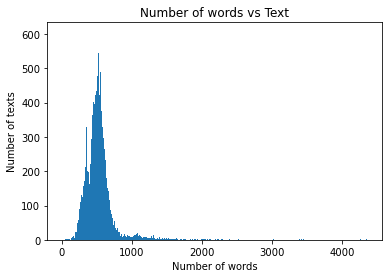

In [164]:
plt_size = [len(x) for x in X]
plt.hist(plt_size, bins = 700)
plt.xlabel('Number of words')
plt.ylabel('Number of texts')
plt.title('Number of words vs Text')
plt.show()

In [94]:
#now let us truncate those news with more than 1000 words

nos = np.array(plt_size)
len(nos[nos>1000])

724

In [95]:
max_len = 1000
X = pad_sequences(X,maxlen = max_len)

In [113]:
vocab = tokenizer.word_index
new_vocab_size = len(vocab) + 1 #for unknown values
print(vocab)

{'the': 1, 'to': 2, 'of': 3, 'a': 4, 'and': 5, 'in': 6, 'is': 7, 'that': 8, 'for': 9, 'on': 10, 'as': 11, 'with': 12, 'it': 13, 'by': 14, 'bitcoin': 15, 'be': 16, 'has': 17, 'are': 18, 'at': 19, 'from': 20, 'this': 21, 'will': 22, 'its': 23, 'blockchain': 24, 'cryptocurrency': 25, 'an': 26, 'was': 27, 'have': 28, 'price': 29, 'not': 30, 'which': 31, 'their': 32, 'market': 33, 'more': 34, 'or': 35, 'crypto': 36, 'we': 37, 'but': 38, 'can': 39, 'said': 40, 'also': 41, 'new': 42, 'trading': 43, 'last': 44, 'they': 45, 'been': 46, 'cryptocurrencies': 47, 'he': 48, 'exchange': 49, 'one': 50, 'all': 51, 'other': 52, 'there': 53, 'could': 54, 'would': 55, 'if': 56, 'over': 57, 'level': 58, 'support': 59, 'time': 60, 'about': 61, 'ethereum': 62, '2018': 63, 'technology': 64, 'up': 65, 'may': 66, 'above': 67, 'investors': 68, 'platform': 69, 'out': 70, 'company': 71, 'than': 72, 'digital': 73, 'financial': 74, 'users': 75, 'into': 76, 'first': 77, 'now': 78, 'you': 79, 'some': 80, 'such': 81, '

In [116]:
def get_weight_matrix(model):
    weight_matrix = np.zeros((new_vocab_size, DIM))
    
    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]
    
    return weight_matrix

In [117]:
embedding_vectors = get_weight_matrix(word2vec_model)

In [120]:
embedding_vectors.shape

(123472, 100)

In [123]:
model = Sequential()
model.add(Embedding(new_vocab_size,output_dim=DIM,weights=[embedding_vectors],input_length=max_len,trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics =['acc'])

In [124]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 100)         12347200  
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 12,464,577
Trainable params: 117,377
Non-trainable params: 12,347,200
_________________________________________________________________


In [125]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [126]:
model.fit(X_train, y_train, validation_split=0.3, epochs = 6)

Epoch 1/6
365/365 [==============================] - 157s 427ms/step - loss: 0.3624 - acc: 0.8669 - val_loss: 0.3057 - val_acc: 0.8967
Epoch 2/6
365/365 [==============================] - 170s 466ms/step - loss: 0.2715 - acc: 0.9007 - val_loss: 0.2721 - val_acc: 0.9257
Epoch 3/6
365/365 [==============================] - 188s 516ms/step - loss: 0.1627 - acc: 0.9456 - val_loss: 0.1211 - val_acc: 0.9580
Epoch 4/6
365/365 [==============================] - 210s 576ms/step - loss: 0.0690 - acc: 0.9756 - val_loss: 0.0889 - val_acc: 0.9718
Epoch 5/6
365/365 [==============================] - 213s 583ms/step - loss: 0.0560 - acc: 0.9806 - val_loss: 0.0667 - val_acc: 0.9754
Epoch 6/6
365/365 [==============================] - 218s 598ms/step - loss: 0.0499 - acc: 0.9838 - val_loss: 0.1220 - val_acc: 0.9586


In [128]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)

In [129]:
accuracy_score(y_test,y_pred)

0.9616906474820144

In [132]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2541  162]
 [  51 2806]]

True Positives(TP) =  2541

True Negatives(TN) =  2806

False Positives(FP) =  162

False Negatives(FN) =  51


<AxesSubplot:>

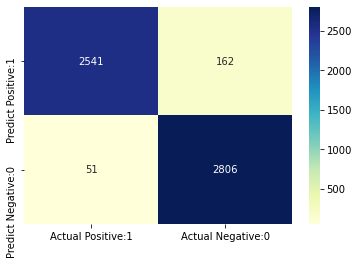

In [133]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [134]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9611


In [130]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2703
           1       0.95      0.98      0.96      2857

    accuracy                           0.96      5560
   macro avg       0.96      0.96      0.96      5560
weighted avg       0.96      0.96      0.96      5560

